In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import signal

In [ ]:
srate = 1000
time = np.arange(10*srate)/srate
npnts = len(time)

#time[[0,-1]]

#create the signal

data = np.random.randn(npnts)

#add 50 Hz line noise

data += np.sin(2*np.pi*50*time)

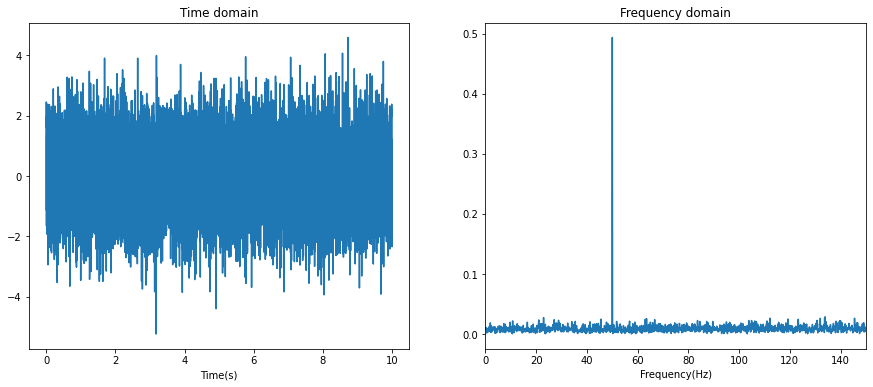

In [ ]:
def plotSignal(data):
  #create a figure

  fig,ax = plt.subplots(1,2,figsize=(15,6))

  #plot the time domain

  ax[0].plot(time,data)
  ax[0].set_xlabel('Time(s)')
  ax[0].set_title('Time domain')

  #plot the frequency-domain domain signal

  dataX =np.abs(scipy.fftpack.fft(data/npnts))
  hz = np.linspace(0,srate/2,int(npnts/2)+1)
  ax[1].plot(hz,dataX[:len(hz)])
  ax[1].set_xlim([0,150])
  ax[1].set_xlabel('Frequency(Hz)')
  ax[1].set_title('Frequency domain')



plotSignal(data)

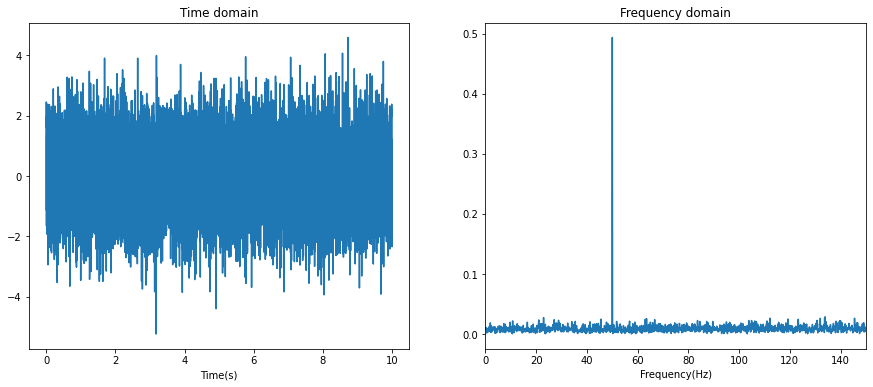

In [ ]:
def plot2Signal(data1,data2):
  #create a figure

  fig,ax = plt.subplots(1,2,figsize=(15,6))

  #plot the time domain

  ax[0].plot(time,data1,label='Original')
  ax[0].plot(time,data2,label='Notched')
  ax[0].set_xlabel('Time(s)')
  ax[0].set_title('Time domain')

  #plot the frequency domain signal

  data1X =np.abs(scipy.fftpack.fft(data1/npnts))
  data2X =np.abs(scipy.fftpack.fft(data2/npnts))
  hz = np.linspace(0,srate/2,int(npnts/2)+1)
  ax[1].plot(hz,data1X[:len(hz)],label = 'Original')
  ax[1].plot(hz,data2X[:len(hz)],label = 'Filterd')
  ax[1].set_xlim([0,150])
  ax[1].set_xlabel('Frequency(Hz)')
  ax[1].set_title('Frequency domain')

plotSignal(data)

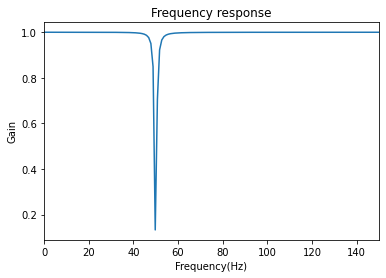

In [ ]:
f0 = 50 #frequency to be notched out
Q  = 50 #quality of filter

# design of notch filter

b,a = signal.iirnotch(f0,Q,srate)

#evaluate the filter

freq,h = signal.freqz(b,a,fs = srate)
plt.plot(freq,np.abs(h)**2)
plt.title('Frequency response')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Gain')
plt.xlim([0,150])
plt.show()


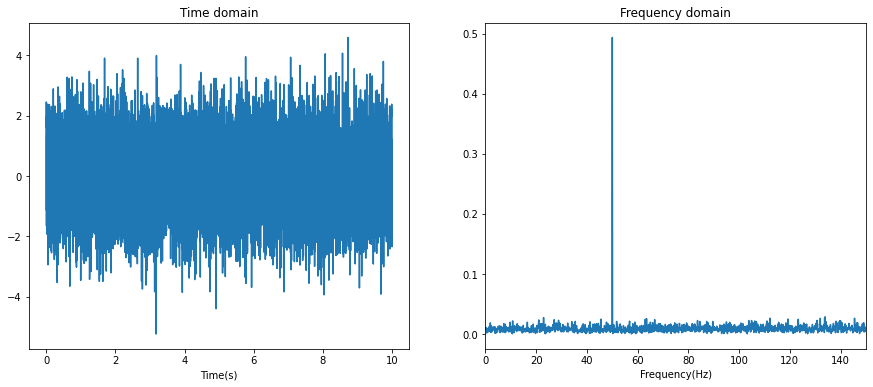

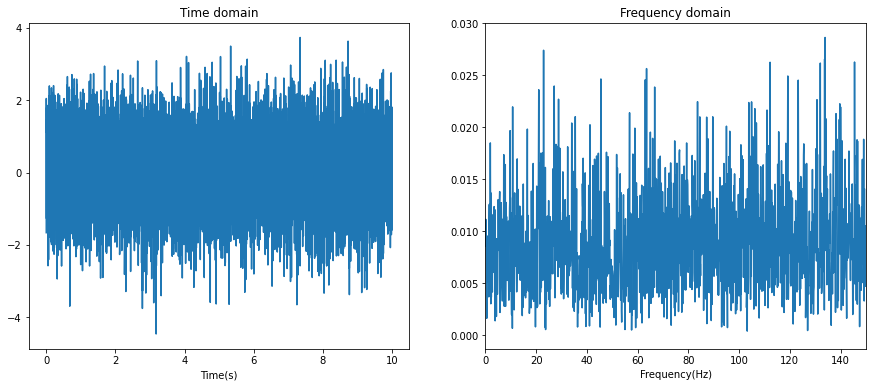

In [ ]:
notched = signal.filtfilt(b,a,data)

plotSignal(data)
plotSignal(notched)